# Magnetized Plasma

This codes tests the Boris magnetic integrator by reproducing results of Bernu Journal de Physique, **42** L253 (1981), [link to paper](https://doi.org/10.1051/jphyslet:019810042012025300). 

We simulate a One Component Plasma composed of $N = 1000$ Hydrogen atoms at a density of $n = 1.62 \times 10^{30}$ $N/m^3$, and temperature $T = 0.3$ $eV$, which leads to $\Gamma = 100$. The system is in a constant magnetic field $B = B_0 \hat{\mathbf z}$ with $B_0 = 17 \times 10^6$ Tesla. The ratio of the cyclotron frequency to the plasma frequency is $\beta \sim 1.0$. 

The YAML input file can be found [here](./input_files/mag_ocp_mks_boris.yaml)

In [1]:
# Import the usual libraries
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
import os

plt.style.use('MSUstyle')
# Import sarkas
from sarkas.processes import Simulation, PostProcess, PreProcess

# Create the file path to the YAML input file
input_file_name = os.path.join('input_files',  'mag_ocp_mks_boris.yaml')

# Preprocessing








     _______.     ___      .______       __  ___      ___           _______.
    /       |    /   \     |   _  \     |  |/  /     /   \         /       |
   |   (----`   /  ^  \    |  |_)  |    |  '  /     /  ^  \       |   (----`
    \   \      /  /_\  \   |      /     |    <     /  /_\  \       \   \    
.----)   |    /  _____  \  |  |\  \----.|  .  \   /  _____  \  .----)   |   
|_______/    /__/     \__\ | _| `._____||__|\__\ /__/     \__\ |_______/    
                                                                            


An open-source pure-python molecular dynamics suite for non-ideal plasmas.




********************************************************************************
                                 Preprocessing                                  
********************************************************************************

Job ID: ocp_mag_boris
Job directory: SarkasSimulations/ocp_mag_boris
PreProcessing directory: 
SarkasSimulations/ocp_mag_boris/Pr

PP acceleration timer:   0%|          | 0/101 [00:00<?, ?it/s]

Time of PP acceleration calculation averaged over 100 steps:
0 min 0 sec 4 msec 886 usec 441 nsec 



PM acceleration timer:   0%|          | 0/101 [00:00<?, ?it/s]

Time of PM acceleration calculation averaged over 100 steps:
0 min 0 sec 21 msec 148 usec 235 nsec 



  0%|          | 0/101 [00:00<?, ?it/s]

Time of a single Equilibration step averaged over 100 steps:
0 min 0 sec 26 msec 764 usec 796 nsec 



  0%|          | 0/101 [00:00<?, ?it/s]

Time of a single Magnetization step averaged over 100 steps:
0 min 0 sec 26 msec 532 usec 945 nsec 



  0%|          | 0/101 [00:00<?, ?it/s]

Time of a single Production step averaged over 100 steps:
0 min 0 sec 26 msec 539 usec 74 nsec 



----------------------- Total Estimated Times ------------------------ 


Equilibration Time: 0 hrs 2 min 13 sec

Magnetization Time: 0 hrs 2 min 12 sec

Production Time: 0 hrs 30 min 57 sec

Total Run Time: 0 hrs 35 min 24 sec


========================= Filesize Estimates =========================

Equilibration:
	Checkpoint filesize: 0 GB 0 MB 87 KB 622 bytes
	Checkpoint folder size: 0 GB 42 MB 795 KB 728 bytes
Magnetization:
	Checkpoint filesize: 0 GB 0 MB 87 KB 622 bytes
	Checkpoint folder size: 0 GB 42 MB 795 KB 728 bytes
Production:
	Checkpoint filesize: 0 GB 0 MB 87 KB 622 bytes
	Checkpoint folder size: 1 GB 173 MB 775 KB 928 bytes

Total minimum required space: 1 GB 259 MB 319 KB 336 bytes


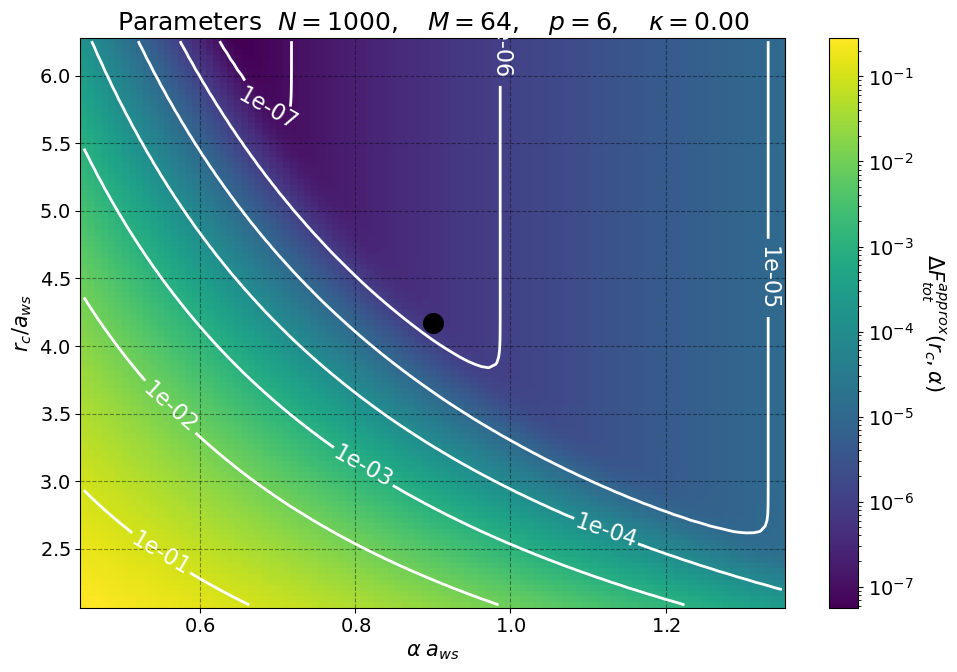

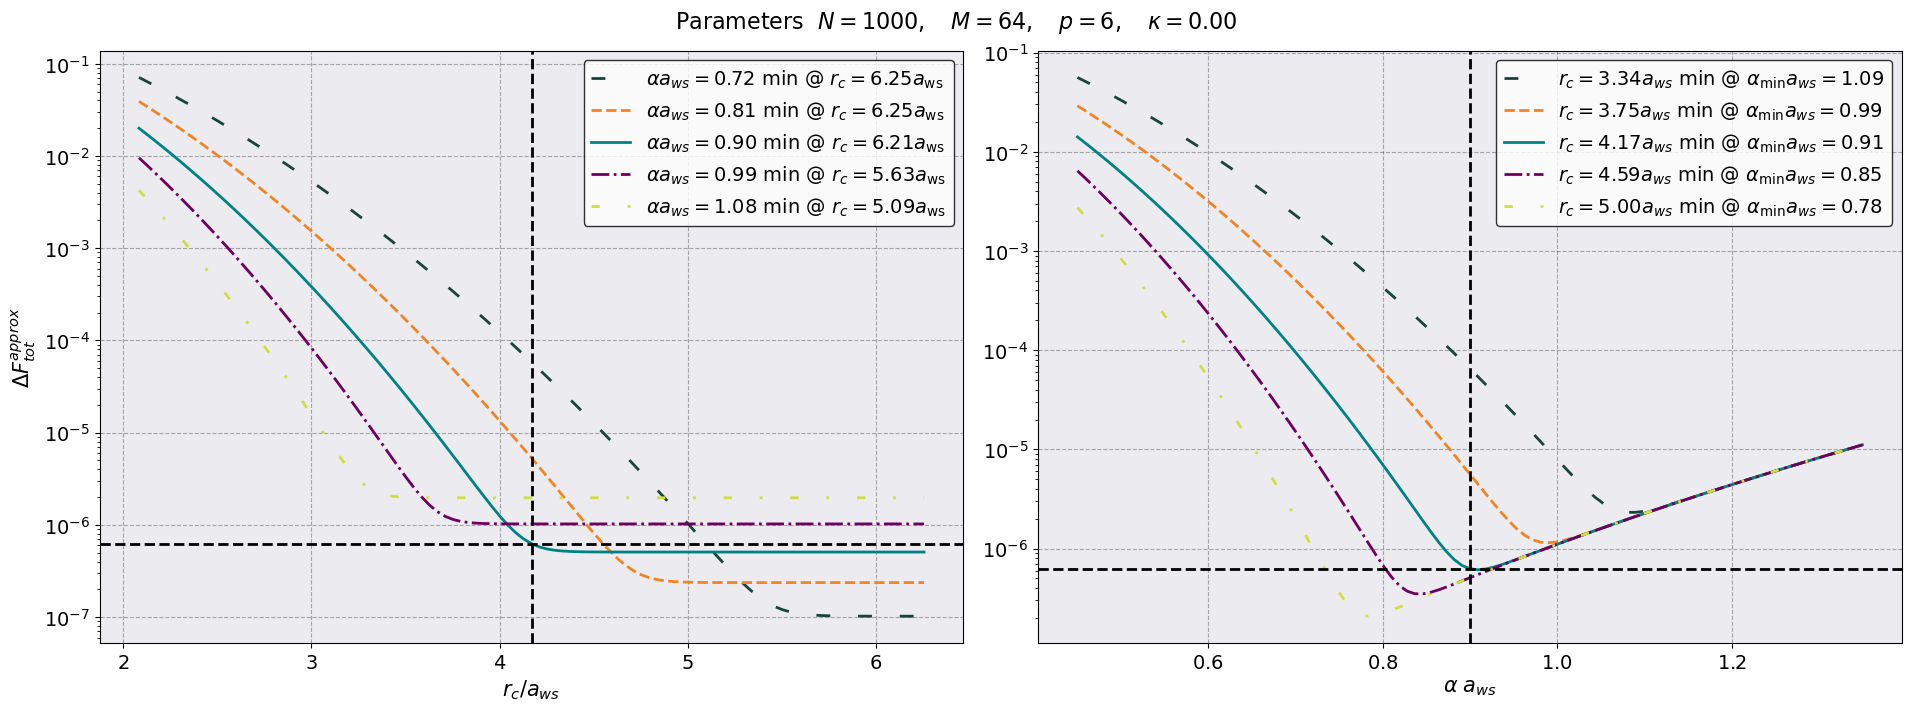

In [2]:
preproc = PreProcess(input_file_name)
preproc.setup(read_yaml=True)
preproc.run(timing=True, loops=100, pppm_estimate = True)

PreProcessing shows that we have chosen good parameters for the pppm algorithm. The black dot in the first plot shows our choice of parameters. This leads to a Total Force Error $\sim 6.2 \times 10^7$. 

A common technique used in magnetized MD is to equilibrate the system in two steps. First without the presence of the magnetic field and then with the magnetic field. This is because, the magnetic field can greatly delay the relaxation to equilibrium see [Ott et al PRE 2017](https://journals.aps.org/pre/abstract/10.1103/PhysRevE.95.013209). Hence the magnetization phase before the production phase.

We confirm that our choice of parameters leads to the same physical system as the one simulated by Bernu. $\Gamma = 95$, $\beta = 1.0$. Contrarily to Bernu we choose to run our simulation for a much longer time. 

    Production:
	No. of production steps = 70000
	Total production time = 7.7000e-13 [s] ~ 1290 w_p = 205 plasma periods
	snapshot interval step = 5
	snapshot interval time = 5.5000e-17 [s] = 9.2153e-02 w_p = 1.4667e-02 plasma periods
	Total number of snapshots = 14000

Bernu ran a simulation for 244 plasma periods. We decided to run for a time 5 times longer. This is because we want to show the time slicing option in the Postprocessing phase.

The estimated times, on this machine, are 

    ----------------------- Total Estimated Times ------------------------ 


    Equilibration Time: 0 hrs 2 min 20 sec

    Magnetization Time: 0 sec 0 msec 0 usec 0 nsec

    Production Time: 0 hrs 33 min 11 sec

    Total Run Time: 0 hrs 35 min 31 sec

and the entire run requires

    Total minimum required space: 1 GB 43 MB 1009 KB 192 bytes

We are ready to start the simulation.

In [3]:
import platform, psutil

info={}
info['platform']=platform.system()
info['platform-release']=platform.release()
info['architecture']=platform.machine()
info['processor']=platform.processor()
info['ram']=str(round(psutil.virtual_memory().total / (1024.0 **3)))+" GB"

display(info)


{'platform': 'Darwin',
 'platform-release': '22.6.0',
 'architecture': 'arm64',
 'processor': 'arm',
 'ram': '32 GB'}

# Simulation

In [4]:
sim = Simulation(input_file_name)
sim.setup(read_yaml=True)
sim.run()







 __            _             
/ _\ __ _ _ __| | ____ _ ___ 
\ \ / _` | '__| |/ / _` / __|
_\ \ (_| | |  |   < (_| \__ \
\__/\__,_|_|  |_|\_\__,_|___/
                             


An open-source pure-python molecular dynamics suite for non-ideal plasmas.




********************************************************************************
                                   Simulation                                   
********************************************************************************

Job ID: ocp_mag_boris
Job directory: SarkasSimulations/ocp_mag_boris
Simulation directory: 
SarkasSimulations/ocp_mag_boris/Simulation

Equilibration dumps directory: 
SarkasSimulations/ocp_mag_boris/Simulation/Equilibration/dumps
Production dumps directory: 
SarkasSimulations/ocp_mag_boris/Simulation/Production/dumps

Equilibration Thermodynamics file: 
SarkasSimulations/ocp_mag_boris/Simulation/Equilibration/EquilibrationEnergy_ocp_mag_boris.csv
Production Thermodynamics file: 
Sark

  0%|          | 0/5000 [00:00<?, ?it/s]


Equilibration Time: 0 hrs 2 min 13 sec


----------------------------Magnetization----------------------------- 



  0%|          | 0/5000 [00:00<?, ?it/s]


Magnetization Time: 0 hrs 2 min 11 sec


------------------------------Production------------------------------ 



  0%|          | 0/70000 [00:00<?, ?it/s]


Production Time: 0 hrs 31 min 20 sec

Total Time: 0 hrs 35 min 45 sec


========================= Filesize Estimates =========================

Equilibration:
	Checkpoint filesize: 0 GB 0 MB 87 KB 622 bytes
	Checkpoint folder size: 0 GB 42 MB 795 KB 728 bytes
Magnetization:
	Checkpoint filesize: 0 GB 0 MB 87 KB 622 bytes
	Checkpoint folder size: 0 GB 42 MB 795 KB 728 bytes
Production:
	Checkpoint filesize: 0 GB 0 MB 87 KB 622 bytes
	Checkpoint folder size: 1 GB 173 MB 775 KB 928 bytes

Total occupied space: 1 GB 259 MB 319 KB 336 bytes


# PostProcessing

In [5]:
from sarkas.tools.observables import Thermodynamics, RadialDistributionFunction, VelocityAutoCorrelationFunction

postproc = PostProcess(input_file_name)
postproc.setup(read_yaml=True)







  _________             __                   
 /   _____/____ _______|  | _______    ______
 \_____  \\__  \\_  __ \  |/ /\__  \  /  ___/
 /        \/ __ \|  | \/    <  / __ \_\___ \ 
/_______  (____  /__|  |__|_ \(____  /____  >
        \/     \/           \/     \/     \/ 


An open-source pure-python molecular dynamics suite for non-ideal plasmas.




********************************************************************************
                                 Postprocessing                                 
********************************************************************************

Job ID: ocp_mag_boris
Job directory: SarkasSimulations/ocp_mag_boris
PostProcessing directory: 
SarkasSimulations/ocp_mag_boris/PostProcessing

Equilibration dumps directory: 
SarkasSimulations/ocp_mag_boris/Simulation/Equilibration/dumps
Production dumps directory: 
SarkasSimulations/ocp_mag_boris/Simulation/Production/dumps

Equilibration Thermodynamics file: 
SarkasSimulations/ocp_mag_bo



=========================== Thermodynamics ===========================
Data saved in: 
 SarkasSimulations/ocp_mag_boris/PostProcessing/Thermodynamics/Production/Thermodynamics_ocp_mag_boris.h5
Data accessible via: self.dataframe_slices, self.dataframe

Time Series Data:
No. of blocks = 1
No. dumps per block = 14000
Total time per block: T = 7.7000e-13 [s] ~ 205 plasma periods
Time interval: dt = 5.5000e-17 [s] ~ 1.5e-02 plasma period


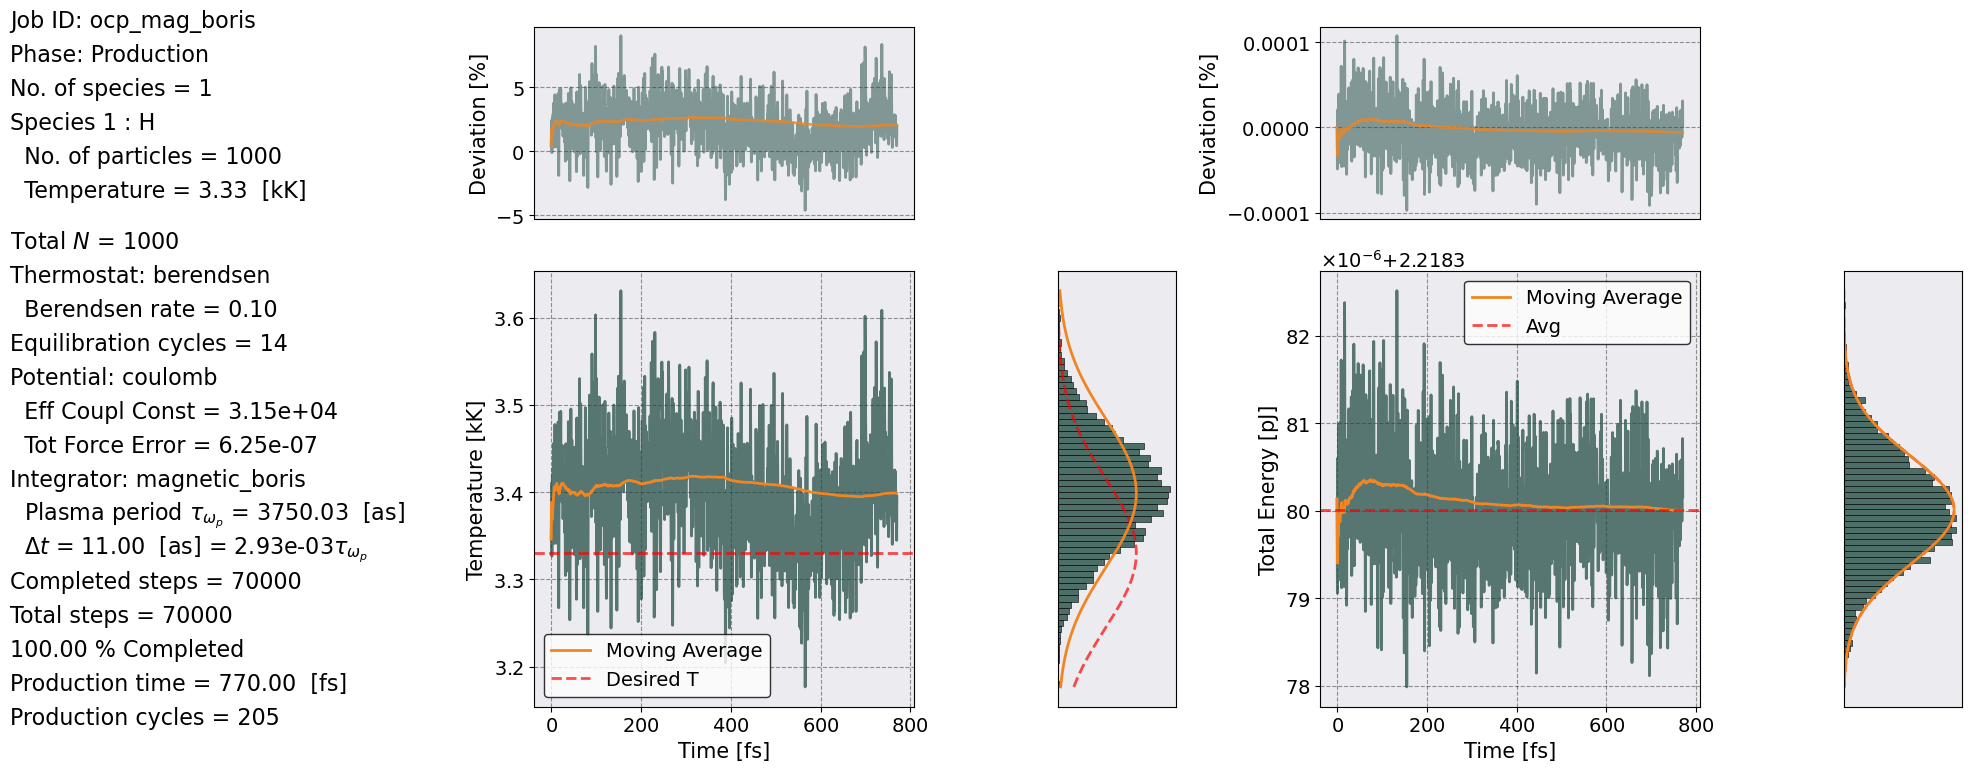

In [6]:
therm = Thermodynamics()
therm.setup(postproc.parameters)
therm.temp_energy_plot(postproc)
# postproc.therm.plot(scaling = 1.0e-15, y = 'Total Energy', logy = True, xlabel = r'$t$ [fs]')

The energy remained fairly constant over the entire production phase. The Temperature similarly oscillated widly ($\sim 5 \%$) but its average is exactly the desired value. Both the Temperature and the Total Energy show a Gaussian distribution around their means.

We are ready to calculate the diffusion coefficient.

## Transport

In the case of a magnetized plasma we have two diffusion coefficients:

$$ 
D_{\parallel}(\tau) = \frac{k_B T}{m} \int_0^\tau dt Z_{\parallel}(t), \quad D_{\perp}(\tau) = \frac{k_B T}{m} \int_0^\tau dt Z_{\perp}(t)
$$

where, for the case of a constant magnetic field in the $z$-direction

$$ 
Z_{\parallel}(t) = \langle v_z(t)v_z(0) \rangle, \quad Z_{\perp}(t) = \frac{1}{2} \left [ \langle v_x(t)v_x(0) \rangle + \langle v_y(t)v_y(0) \rangle \right ],
$$

are the velocity autocorrelation functions. These functions are calculated by the class [VelocityAutocorrelationFunction](../../api/tools_subpckg/sarkas.tools.observables.VelocityAutoCorrelationFunction.rst) in [sarkas.tools.observables](../../api/tools_subpckg/sarkas.tools.observables.rst). This class calculates and saves $Z(t)$ for each axis and the total $Z(t) = \frac{1}{3} \left [ Z_x(t) + Z_y(t) + Z_z(t) \right ]$. 

Transport coefficient are calculated using the [TransportCoefficients](../../api/tools_subpckg/sarkas.tools.transport.TransportCoefficients.rst) class from the [sarkas.tools.transport](../../api/tools_subpckg/sarkas.tools.transport.rst). This method requires the parameters of the simulation passed as `postproc.parameters`. The `phase` argument in this case is not needed since `production` is the default phase, and the number of slices in which to divide the simulation,`no_slices`. As mentioned above we decided to run our simulation 5 times longer than Bernu's. This is because we wanted to divide our long simulation into 5 small simulations of length ~ 258 $\omega_p T$ (Bernu's was 244 $\omega_p T$), calculate the diffusion coefficients for each of them, and average them. 

Sarkas was created with this workflow in mind and the option ``no_slices`` allows to do exactly this.

Once the class is imported the diffusion coefficiey calling the method [diffusion](../../api/tools_subpckg/TransportCoefficients_methods/sarkas.tools.transport.TransportCoefficients.diffusion.rst). This method takes care of calnt is calculated bculating the perpendicular and parallel diffusion coefficients, and plot their averages with a shaded area.

It is important to note that the [diffusion](../../api/tools_subpckg/TransportCoefficients_methods/sarkas.tools.transport.TransportCoefficients.diffusion.rst) method assume a constant magnetic field in the $z$-direction. Arbitrary directions of the magnetic field are not supported at the moment. 
 

In [ ]:
vacf = VelocityAutoCorrelationFunction()
vacf.setup(postproc.parameters,
        phase = 'production',
    )
vacf.compute()
# vacf.parse()



======================= Diffusion Coefficient ======================== 

Data saved in: 
 Simulations/ocp_mag_boris/PostProcessing/TransportCoefficients/Production/Diffusion_ocp_mag_boris.h5
Simulations/ocp_mag_boris/PostProcessing/TransportCoefficients/Production/Diffusion_slices_ocp_mag_boris.h5

No. of slices = 5
No. dumps per slice = 560
Time interval of autocorrelation function = 1.5400e-13 [s] ~ 258 w_p T


  0%|          | 0/5 [00:00<?, ?it/s]

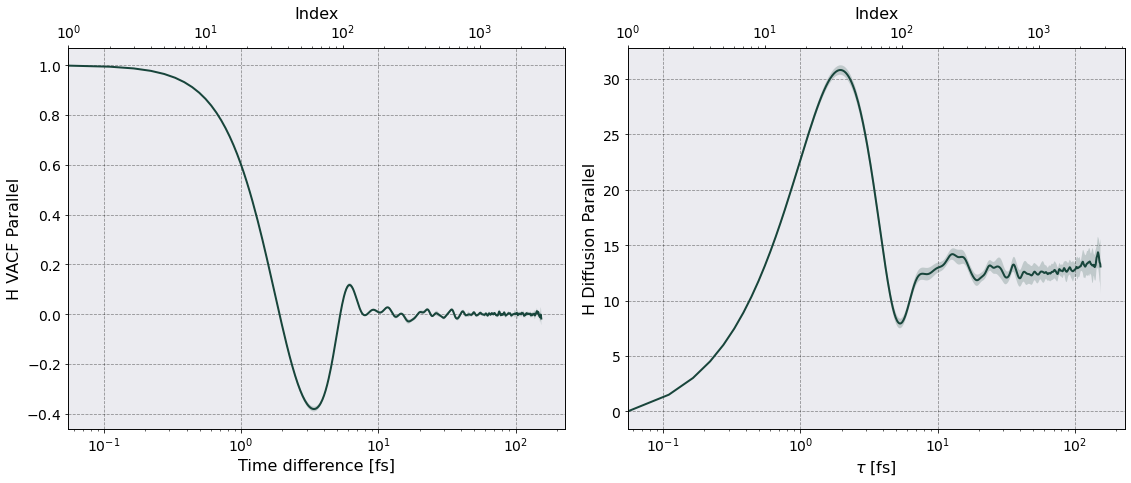

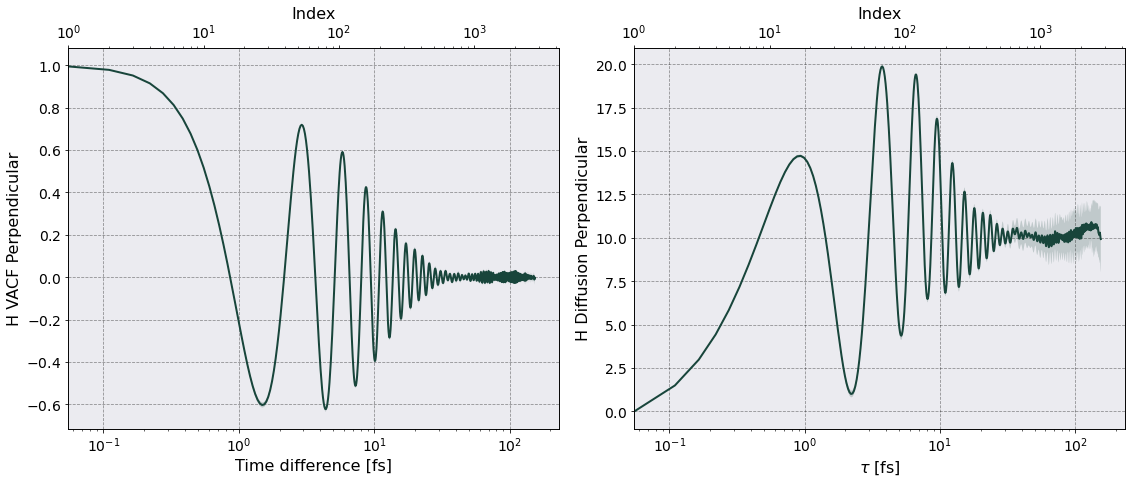

In [ ]:
tc = TransportCoefficients(postproc.parameters, phase = 'production', no_slices = 5)
tc.diffusion(vacf)

In [ ]:
tc.diffusion_df

Time   H Diffusion                                          
               NaN      Parallel               Perpendicular              
               NaN          Mean           Std          Mean           Std
0     0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00
1     5.500000e-17  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00
2     1.100000e-16  1.513632e-09  1.449843e-11  1.500904e-09  9.712383e-12
3     1.650000e-16  3.022980e-09  2.899158e-11  2.985556e-09  1.927020e-11
4     2.200000e-16  4.523784e-09  4.346764e-11  4.437928e-09  2.852923e-11
...            ...           ...           ...           ...           ...
2795  1.537250e-13  1.317944e-08  2.338327e-09  9.956043e-09  1.893927e-09
2796  1.537800e-13  1.315739e-08  2.371333e-09  9.951686e-09  1.899606e-09
2797  1.538350e-13  1.313432e-08  2.404148e-09  9.946636e-09  1.905537e-09
2798  1.538900e-13  1.311026e-08  2.436658e-09  9.940771e-09  1.911840e-09
2799  1.539450e-13  1.308527e-08  2.468751e-09  9.933983e-09  1.918634e-09

[2800 rows x 5 columns]

Once the calculation is complete `Sarkas` produces a figure for each diffusion coefficient containing two ``subplots``: a plot of $Z_{\parallel}(t)(Z_{\perp}(t) )$ on the left and a plot of $D_{\parallel}(\tau)$ $(D_{\perp}(\tau))$ on the right.
The above plots are in mks units, let's rescale by $\omega_p a_{\rm ws}^2$.

[None, Text(0.5, 0, 'Index')]

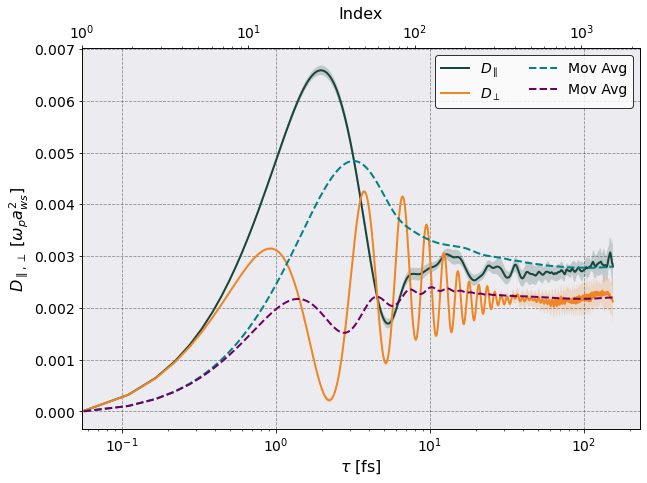

In [ ]:
rescaling = postproc.parameters.total_plasma_frequency * postproc.parameters.a_ws**2
fig, ax = plt.subplots(1,1, figsize=(10,7))
ax2 = ax.twiny()
ax.plot(tc.diffusion_df["Time"].iloc[:,0]*1e15, tc.diffusion_df[("H Diffusion", "Parallel","Mean")]/rescaling,
       label = r'$D_{\parallel}$')
ax.fill_between(
    tc.diffusion_df["Time"].iloc[:,0]*1e15, 
    tc.diffusion_df[("H Diffusion", "Parallel","Mean")]/rescaling - tc.diffusion_df[("H Diffusion", "Parallel","Std")]/rescaling,
    tc.diffusion_df[("H Diffusion", "Parallel","Mean")]/rescaling + tc.diffusion_df[("H Diffusion", "Parallel","Std")]/rescaling,
    alpha = 0.2)

# Perpendicular
ax.plot(tc.diffusion_df["Time"].iloc[:,0]*1e15, tc.diffusion_df[("H Diffusion", "Perpendicular","Mean")]/rescaling,
        label = r'$D_{\perp}$')
ax.fill_between(
    tc.diffusion_df["Time"].iloc[:,0]*1e15, 
    tc.diffusion_df[("H Diffusion", "Perpendicular","Mean")]/rescaling - tc.diffusion_df[("H Diffusion", "Perpendicular","Std")]/rescaling,
    tc.diffusion_df[("H Diffusion", "Perpendicular","Mean")]/rescaling + tc.diffusion_df[("H Diffusion", "Perpendicular","Std")]/rescaling,
    alpha = 0.2)

ax.plot(tc.diffusion_df["Time"].iloc[:,0]*1e15, tc.diffusion_df[("H Diffusion", "Parallel","Mean")].expanding().mean()/rescaling,
       ls = '--', label = 'Mov Avg')

ax.plot(tc.diffusion_df["Time"].iloc[:,0]*1e15, tc.diffusion_df[("H Diffusion", "Perpendicular","Mean")].expanding().mean()/rescaling,
        ls = '--', label = r'Mov Avg')
# ax.axhline(coefficient["H Parallel Diffusion avg"].iloc[10]/rescaling)
# ax2.plot(diffusion["H Parallel Diffusion avg"].expanding().mean()/rescaling, ls = '')
# ax.grid(False)
ax.legend(ncol = 2)
ax.set_xlim(tc.diffusion_df["Time"].iloc[1,0]*1e15, 1.5*tc.diffusion_df["Time"].iloc[-1,0]*1e15)
_ = ax.set( xlabel = r'$\tau$ [fs]', ylabel =r'$D_{\parallel,\perp}$ [$\omega_p a_{ws}^2$]', xscale = 'log')

ax2.set_xlim([1,1500*1.5])
ax2.grid(alpha = 0.1)
ax2.set( xscale = 'log', xlabel = 'Index')

This gives a clearer picture of the diffusion coefficient. Note that the diffusion is a constant and not a function of time. This plot is meant to show how the diffusion changes as the upper limit of the time integration is varied. The final value to be published would be an average over the last ~ 800 diffusion values.

In [ ]:
print('The perpendicular diffusion is D_x = {:.4f} w_p a_ws^2'.format(
    1/rescaling * tc.diffusion_df["H Diffusion","Perpendicular","Mean"].iloc[-800:].mean()) ) 
print('The parallel diffusion is D_z = {:.4f} w_p a_ws^2'.format(
    1/rescaling * tc.diffusion_df["H Diffusion","Parallel","Mean"].iloc[-800:].mean()) ) 

The perpendicular diffusion is D_x = 0.0023 w_p a_ws^2
The parallel diffusion is D_z = 0.0029 w_p a_ws^2
